
Exemplos de KNN com gráficos
– Classificação: Iris
– Regressão: California Housing


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    mean_squared_error,
    r2_score,
)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors



# 1) CLASSIFICAÇÃO – IRIS

![Iris Flower Dataset](https://miro.medium.com/v2/resize:fit:1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png)
Source = https://medium.com/@Locemarn/an%C3%A1lise-de-dados-explorat%C3%B3rios-iris-flower-dataset-611cb68fb78e

Fontes:

https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://www.youtube.com/watch?v=DeAuVrhKw58

https://plotly.com/python/3d-scatter-plots/

In [ ]:

iris = load_iris()
X_iris, y_iris = load_iris(return_X_y=True)

In [ ]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

In [ ]:
n_neighbors = 10
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train_i, y_train_i)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = clf.predict(X_test_i)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_i, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', size_max=10,
    color='species',
    height=700,
    width=800,)
plt.tight_layout()
fig.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
confusion_matrix(y_test_i, y_pred)


array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

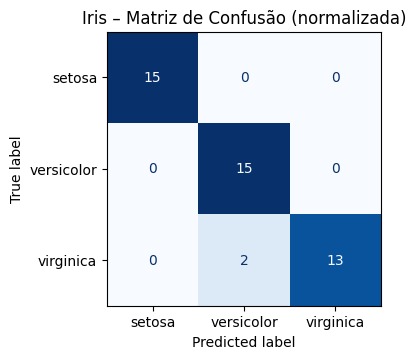

In [ ]:
cm = confusion_matrix(y_test_i, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=load_iris().target_names)

fig1, ax1 = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax1, cmap="Blues", colorbar=False)
ax1.set_title("Iris – Matriz de Confusão (normalizada)")
plt.tight_layout()


=== Classificação Iris ===
Melhor k: 14
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



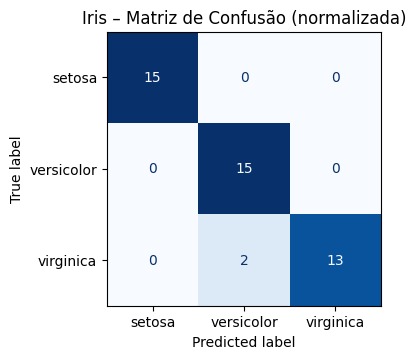

In [ ]:
# Pipeline: padronização + KNN
# Procura o melhor k
# Confusion Matrix
pipe_cls = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier()),
    ]
)


param_grid_cls = {"knn__n_neighbors": range(1, 16)}
grid_cls = GridSearchCV(pipe_cls, param_grid_cls, cv=5)
grid_cls.fit(X_train_i, y_train_i)

print("\n=== Classificação Iris ===")
print("Melhor k:", grid_cls.best_params_["knn__n_neighbors"])
print(classification_report(y_test_i, grid_cls.predict(X_test_i), target_names=load_iris().target_names))


cm = confusion_matrix(y_test_i, grid_cls.predict(X_test_i)) # , normalize="true"
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=load_iris().target_names)

fig1, ax1 = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax1, cmap="Blues", colorbar=False)
ax1.set_title("Iris – Matriz de Confusão (normalizada)")
plt.tight_layout()





# 2) REGRESSÃO – CALIFORNIA HOUSING

In [ ]:
# Carrega dados (baixa na primeira execução; cache local depois)
X_cal, y_cal = fetch_california_housing(return_X_y=True, as_frame=False)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=0
)

pipe_reg = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor()),
    ]
)

param_grid_reg = {
    "knn__n_neighbors": range(3, 21, 2),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan"],
}

grid_reg = GridSearchCV(
    pipe_reg,
    param_grid_reg,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
)
grid_reg.fit(X_train_c, y_train_c)

y_pred_c = grid_reg.predict(X_test_c)
rmse = mean_squared_error(y_test_c, y_pred_c)
r2 = r2_score(y_test_c, y_pred_c)

print("\n=== Regressão California Housing ===")
print("Melhores hiperparâmetros:", grid_reg.best_params_)
print(f"RMSE: {rmse:.3f}")
print(f"R² : {r2:.3f}")




=== Regressão California Housing ===
Melhores hiperparâmetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
RMSE: 0.341
R² : 0.739


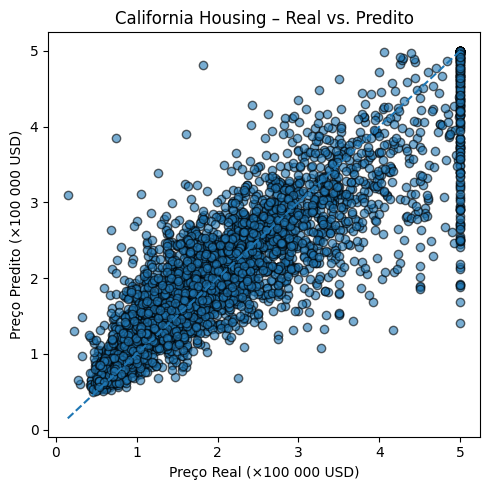

In [ ]:
# - graficos
fig2, ax2 = plt.subplots(figsize=(5, 5))
ax2.scatter(y_test_c, y_pred_c, alpha=0.6, edgecolors="k")
ax2.plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], ls="--")
ax2.set_xlabel("Preço Real (×100 000 USD)")
ax2.set_ylabel("Preço Predito (×100 000 USD)")
ax2.set_title("California Housing – Real vs. Predito")
plt.tight_layout()



plt.show()

# 3) Recomendação simples com filtragem colaborativa baseada em usuários

In [7]:
# Matriz de avaliações (usuários x filmes)
# 0 significa que o usuário não avaliou o filme
# Linhas = Usuários | Colunas = Filmes
ratings = np.array([
    [5, 3, 0],  # Usuário 1
    [4, 0, 4],  # Usuário 2
    [1, 1, 5]   # Usuário 3
])


In [8]:

# Função para prever a nota usando KNN (filtragem colaborativa baseada em usuários)
def predict_rating(user_index, item_index, k=2):
    # Pega os vetores de todos os usuários exceto o atual
    user_ratings = ratings[:, item_index]
    similarities = []

    for other_user in range(ratings.shape[0]):
        if other_user != user_index and ratings[other_user, item_index] != 0:
            # Calcula a similaridade de cosseno entre os usuários
            sim = cosine_similarity(
                [ratings[user_index]],
                [ratings[other_user]]
            )[0][0]
            similarities.append((sim, ratings[other_user, item_index]))

    # Ordena pelos mais similares
    similarities.sort(reverse=True)
    top_k = similarities[:k]

    if not top_k:
        return 0  # Nenhuma informação para prever

    # Média ponderada pelas similaridades
    num = sum(sim * rating for sim, rating in top_k)
    den = sum(abs(sim) for sim, _ in top_k)
    return num / den if den != 0 else 0

In [9]:
# Prevendo a nota do Usuário 1 para o Filme 3
predicted = predict_rating(user_index=0, item_index=2, k=2)
predicted.round(2)

np.float64(4.3)

# 4) Detecção de Anomalias com KNN

In [2]:
# Dados: 2D com um dado discrepante evidente
X = np.array([
    [1, 2], [2, 3], [3, 2], [2, 1],
    [8, 8],  # <- possível anomalia
])

In [5]:
# Ajusta o modelo KNN

k = 2
nbrs = NearestNeighbors(n_neighbors=k+1)  # +1 porque o ponto mais próximo de si mesmo é ele mesmo
nbrs.fit(X)
distances, _ = nbrs.kneighbors(X)

# Ignora o primeiro (distância para si mesmo)
mean_distances = distances[:, 1:].mean(axis=1)

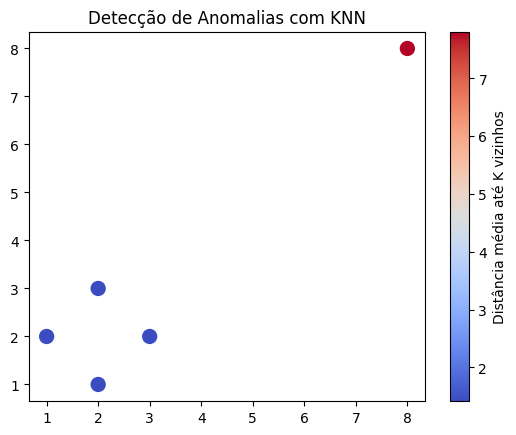

In [6]:
# Visualiza os pontos, destacando o potencial anomalia
plt.scatter(X[:, 0], X[:, 1], c=mean_distances, cmap='coolwarm', s=100)
plt.colorbar(label='Distância média até K vizinhos')
plt.title("Detecção de Anomalias com KNN")
plt.show()